In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
sm, md, lg = 12,9,10
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

# Loading Data

In [3]:
boys = pd.read_csv('../datasets//schools-with-boys-toilet.csv')
girls = pd.read_csv('../datasets/schools-with-girls-toilet.csv')

In [4]:
boys.State_UT.nunique(), girls.State_UT.nunique()

(37, 37)

In [5]:
boys.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [6]:
boys_melt = pd.melt(boys, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melt = pd.melt(girls, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [7]:
boys_melt.head()

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
1,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00
2,Andaman & Nicobar Islands,2015-16,Primary_Only,100.00
3,Andhra Pradesh,2013-14,Primary_Only,53.03
4,Andhra Pradesh,2014-15,Primary_Only,57.91


In [8]:
categ = boys.columns.to_list()[5:] # All student category type in a list
categ

['U_Primary_Only',
 'U_Primary_With_Sec_HrSec',
 'Primary_with_U_Primary_Sec',
 'U_Primary_With_Sec',
 'Sec_Only',
 'Sec_with_HrSec.',
 'HrSec_Only',
 'All Schools']

# Toilet Facilities for Boys in all Student Categories

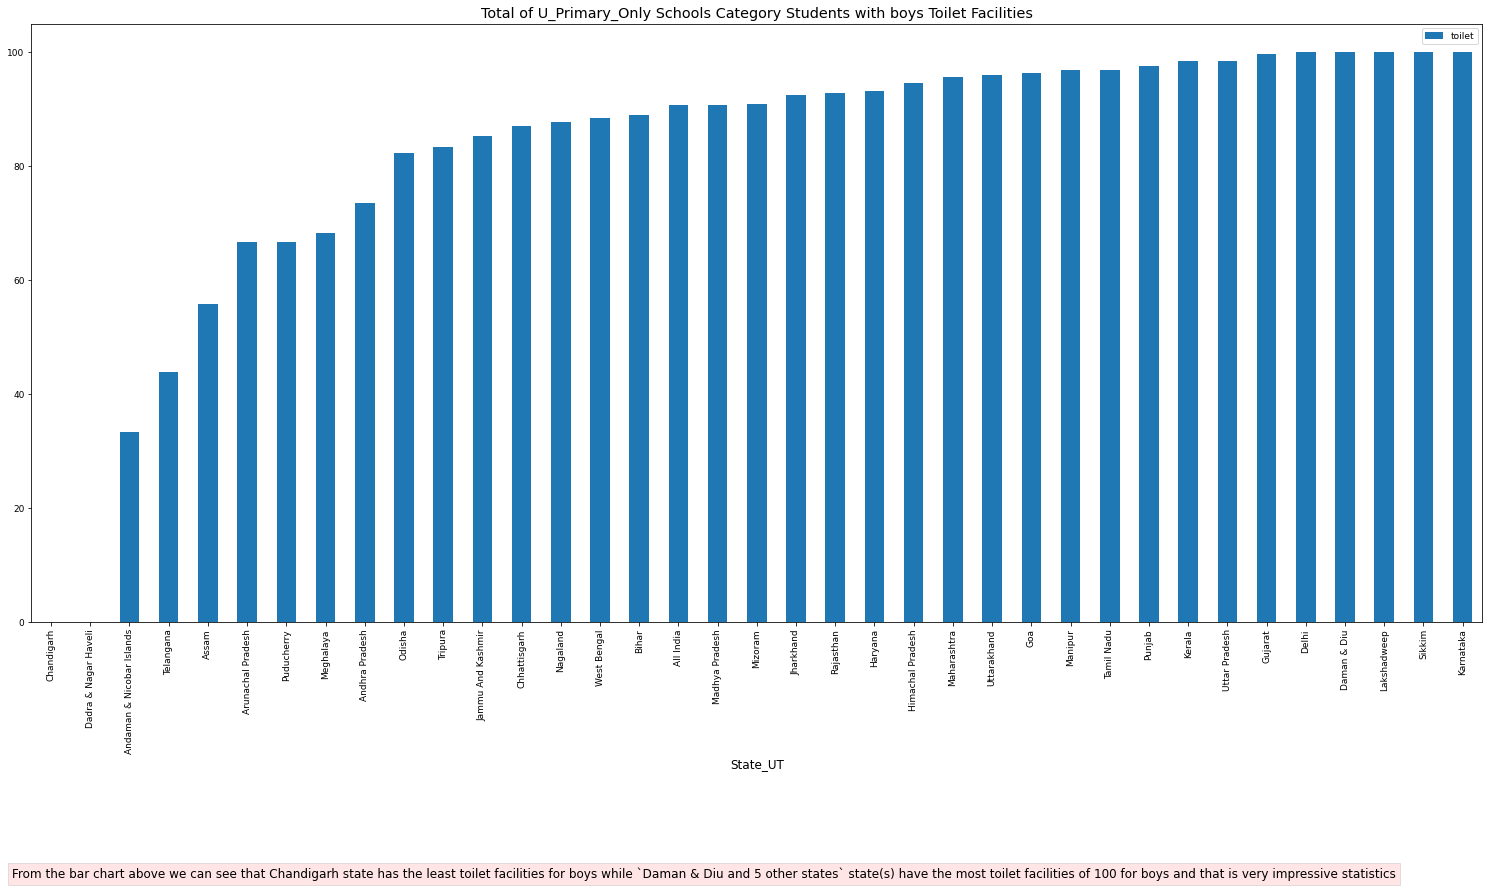

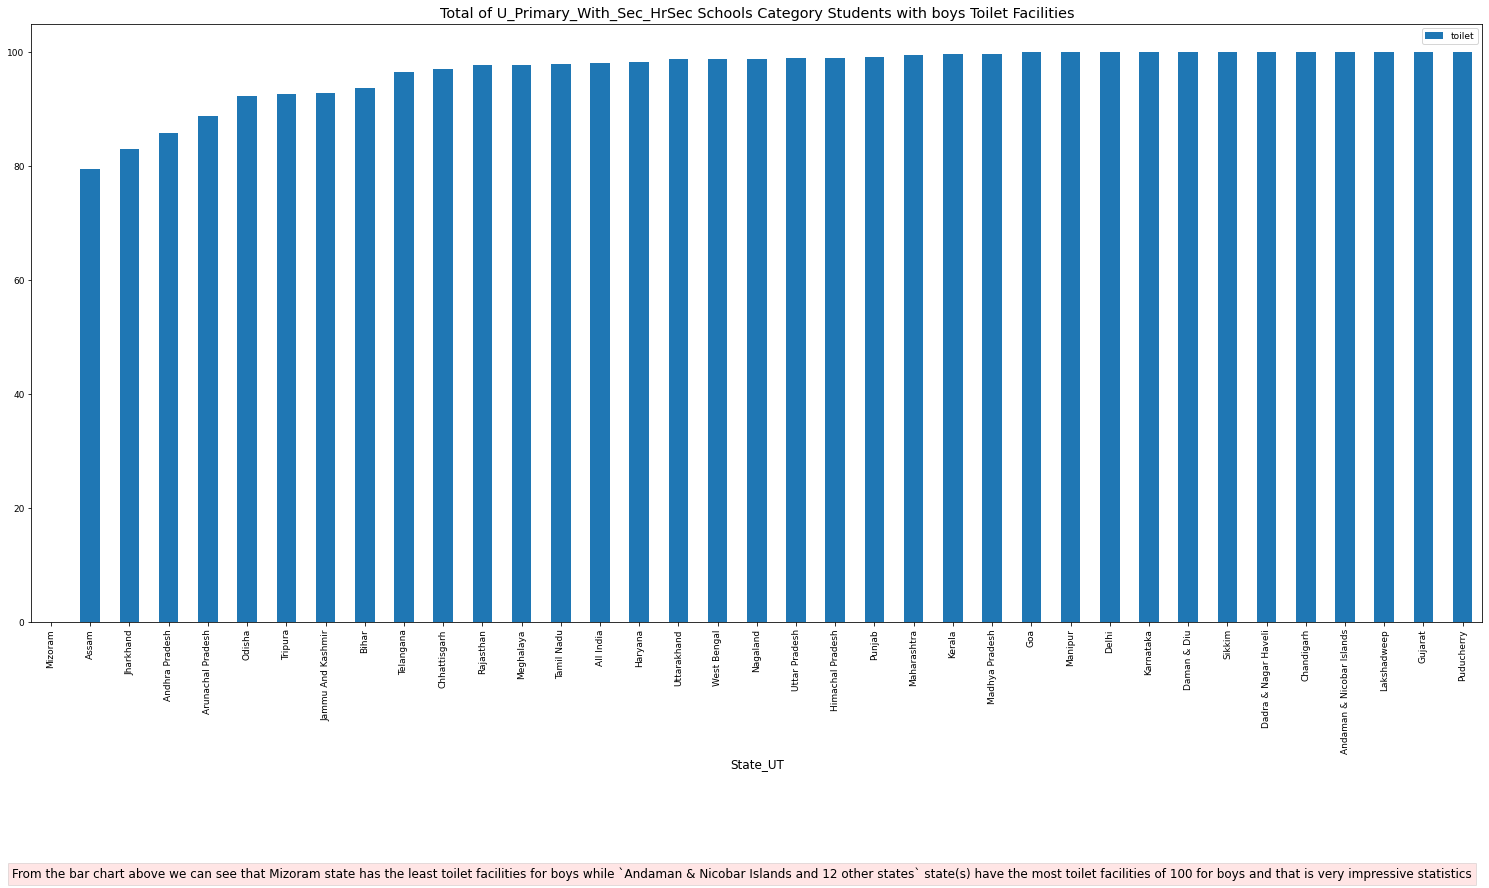

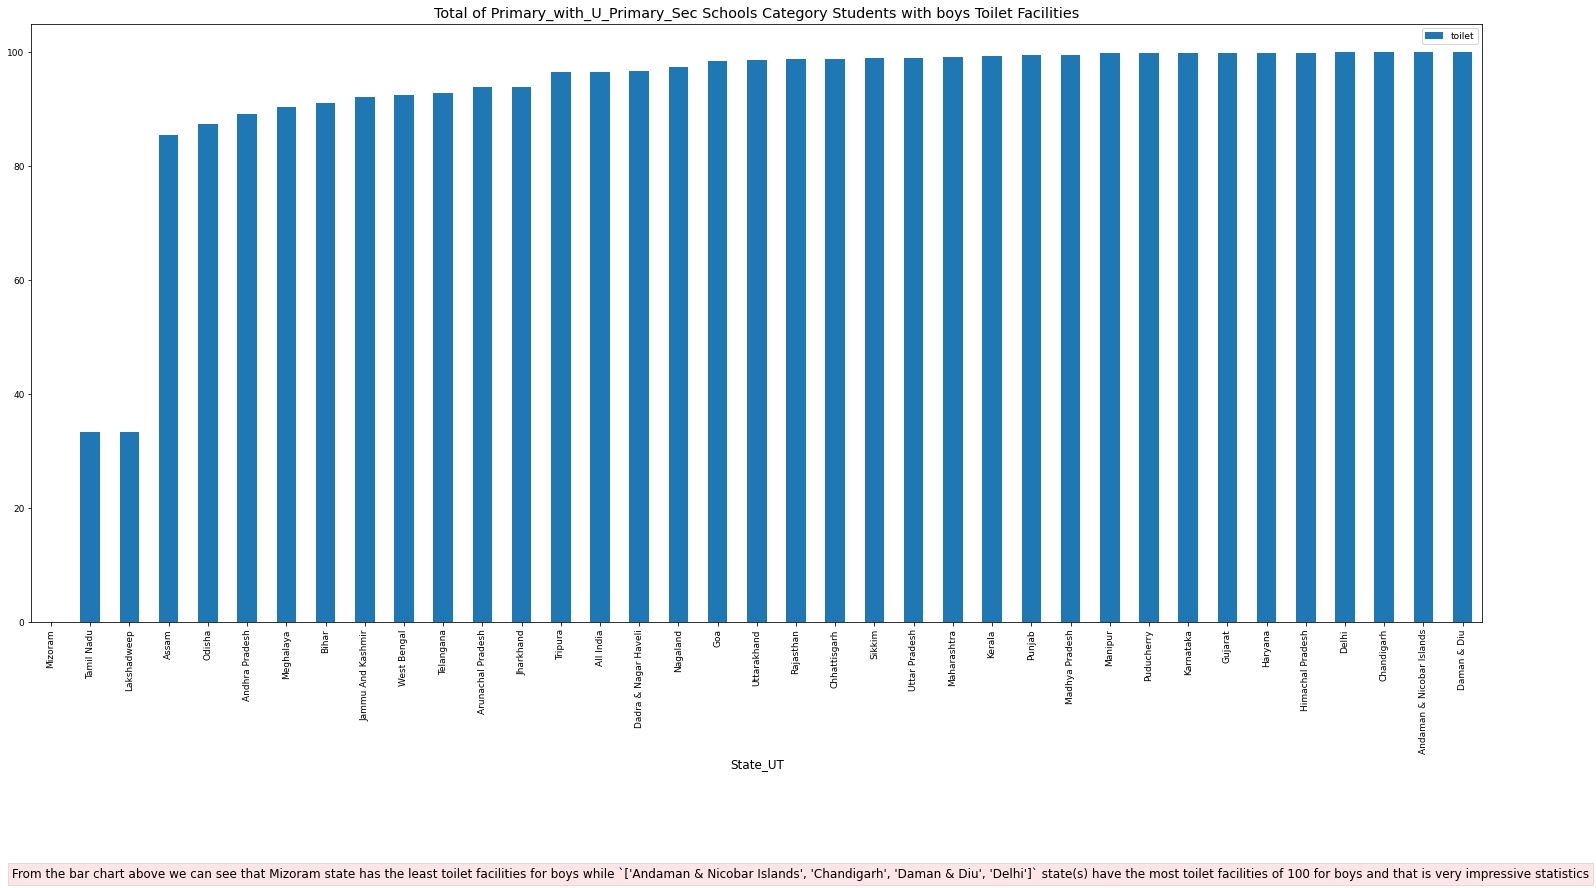

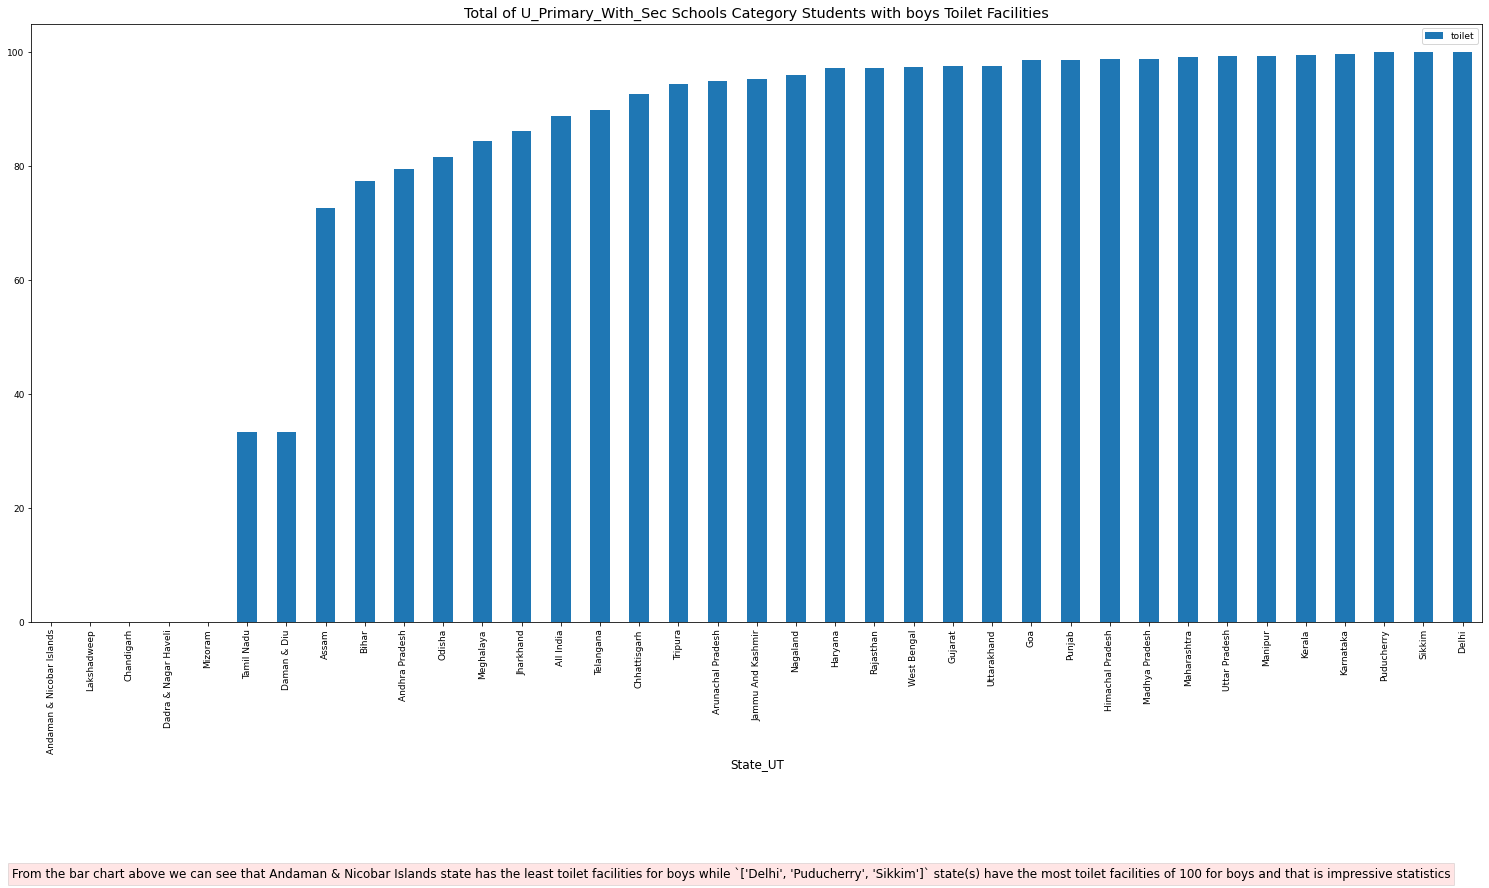

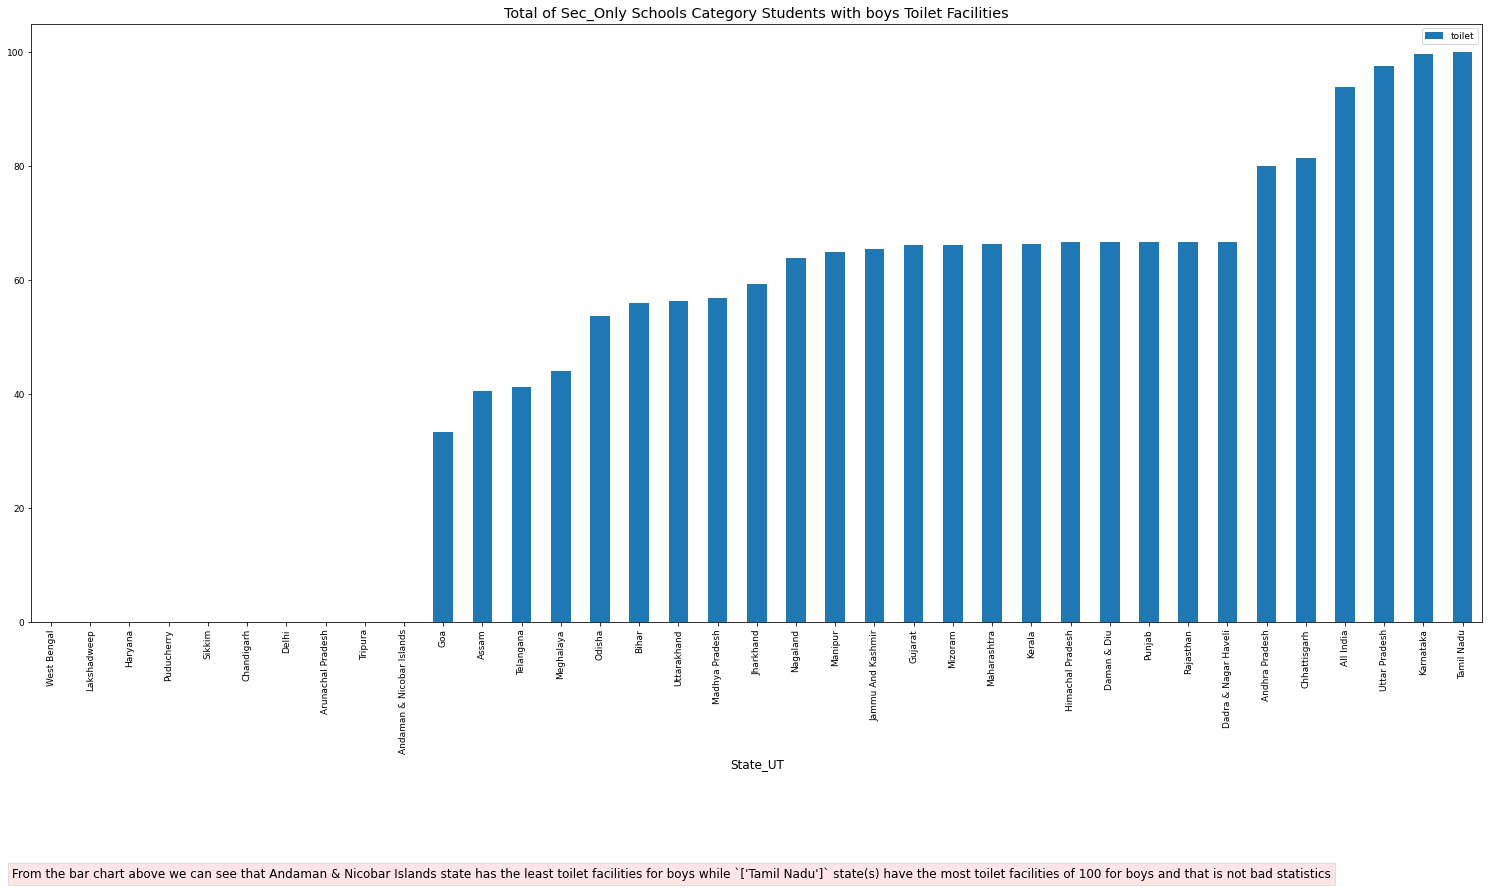

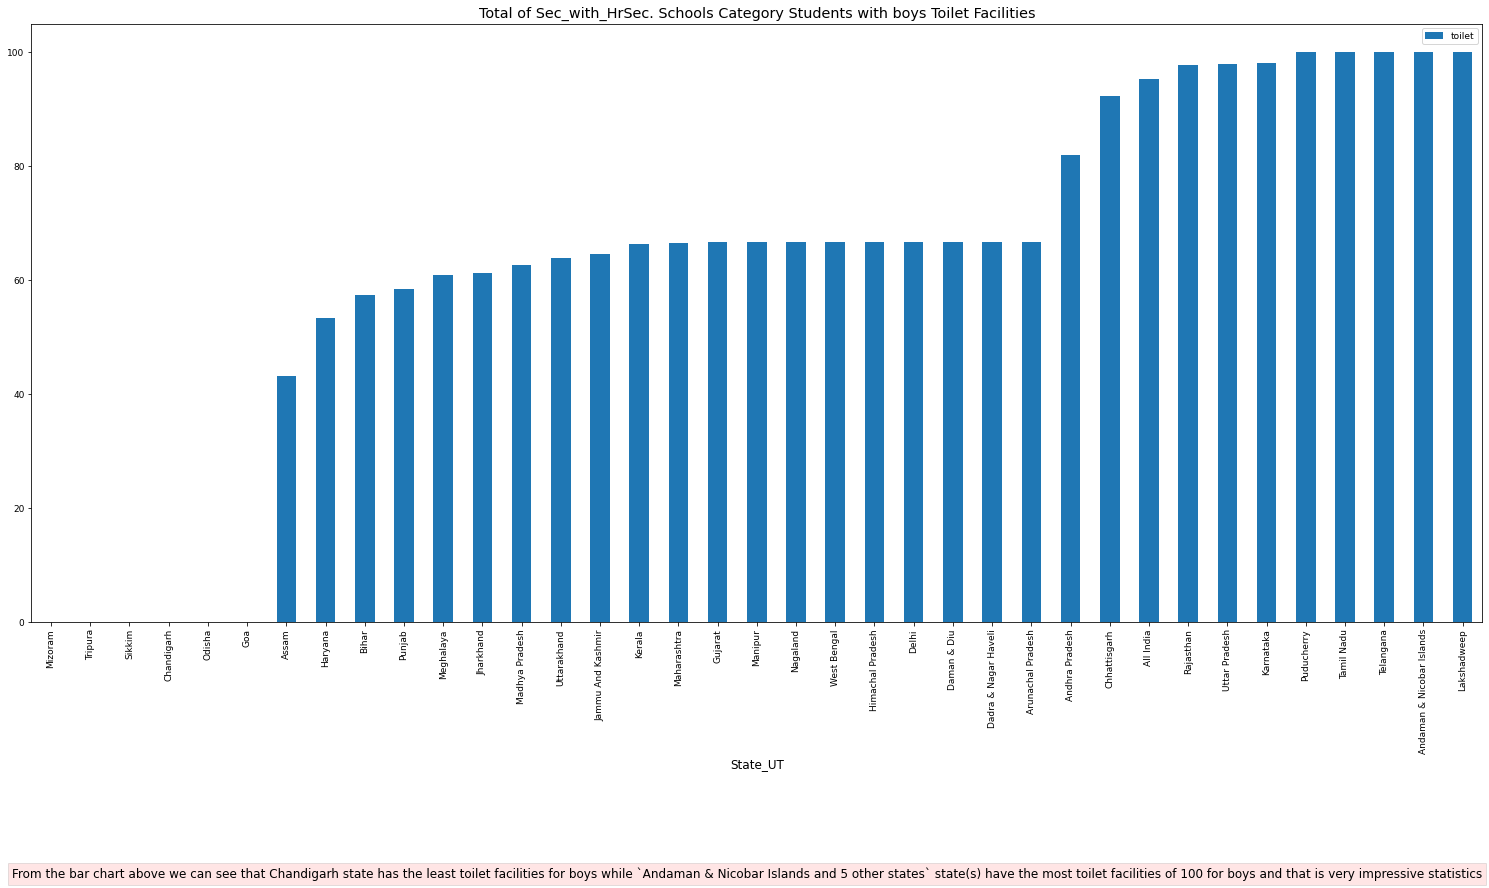

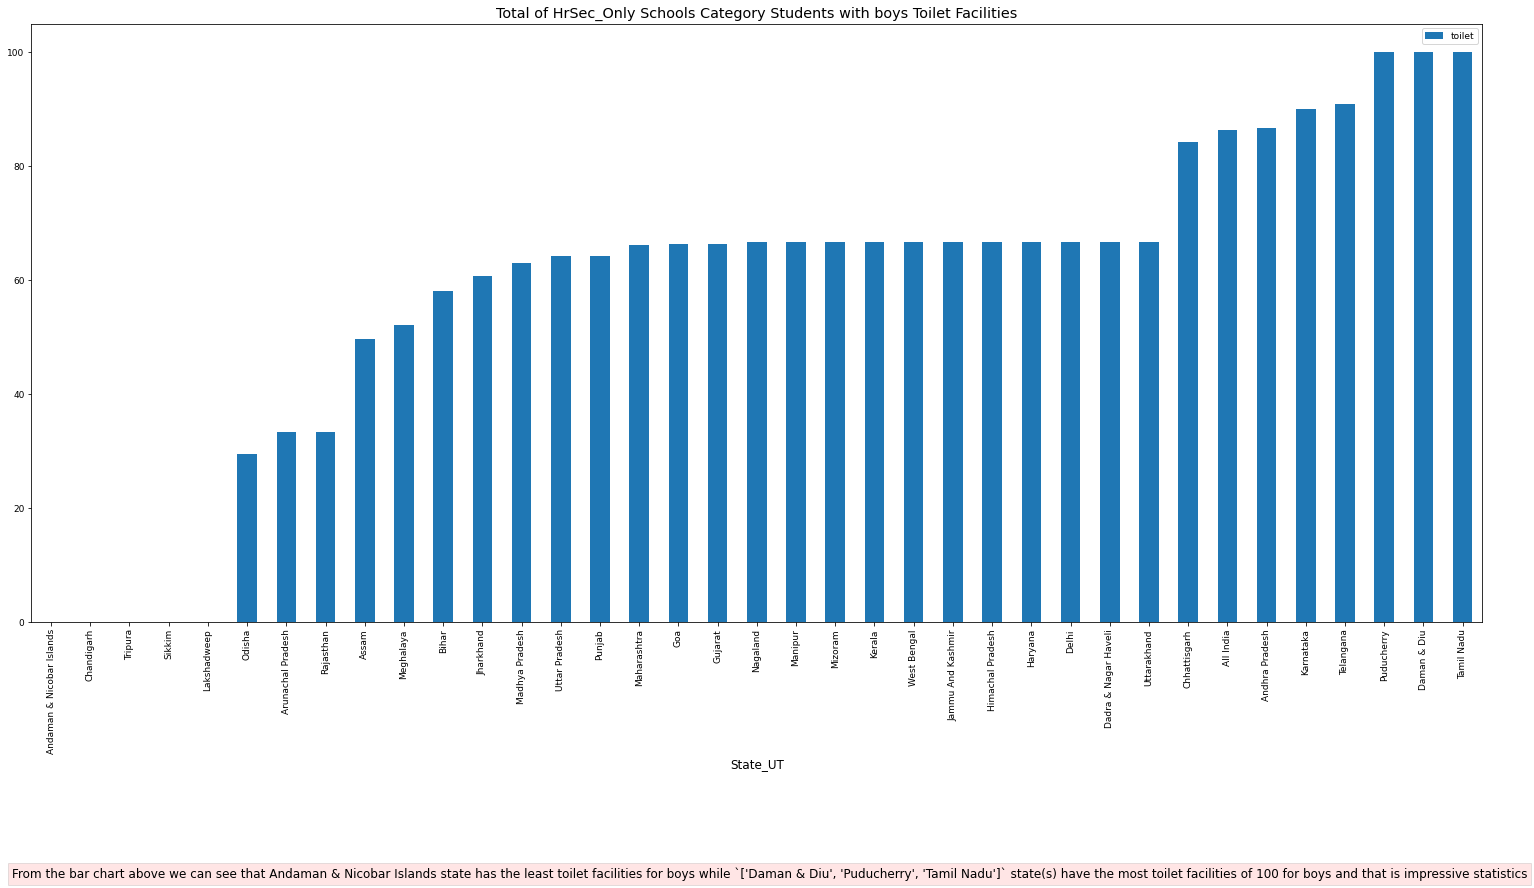

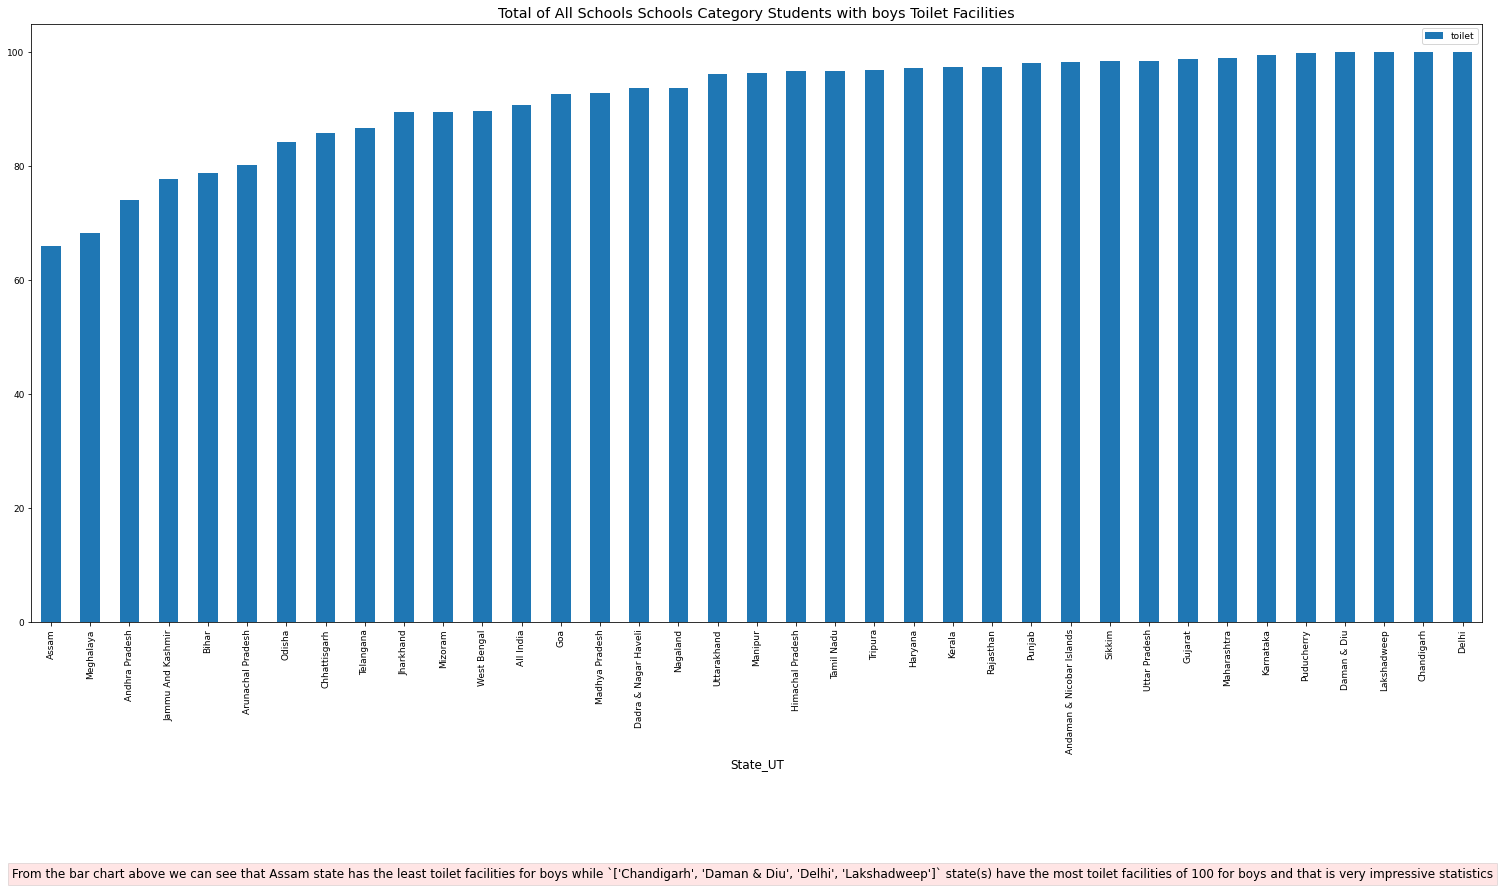

In [9]:
for category in categ:
    tmp_boys = boys_melt[boys_melt['School_Level'] == category]
    mean_tmp_boys = tmp_boys.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_boys.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with boys Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_boys.iloc[np.where(mean_tmp_boys['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_boys.iloc[mean_tmp_boys.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest)) # In the case when we have to many states that have 100 toilet facilities and can't display all
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for boys while `{}` state(s) have the most toilet facilities of 100 for boys and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))

# Toilet Facilities for Girls in all Student Categories

In [10]:
girls_melt.head()

,State_UT,year,School_Level,toilet
0,All India,2013-14,Primary_Only,88.68
1,All India,2014-15,Primary_Only,91.21
2,All India,2015-16,Primary_Only,96.95
3,Andaman & Nicobar Islands,2013-14,Primary_Only,89.74
4,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00


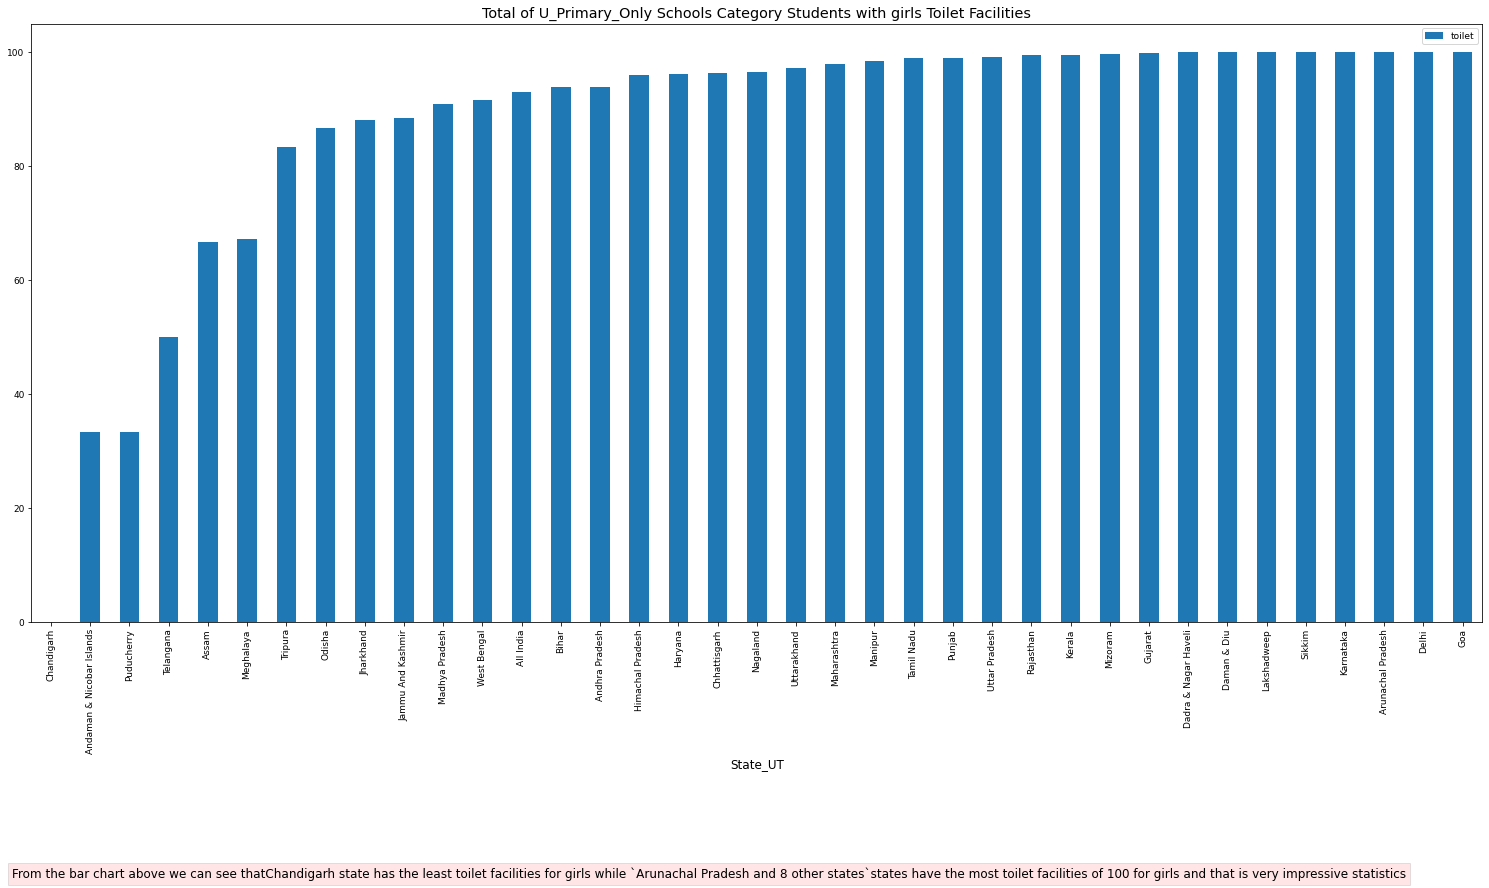

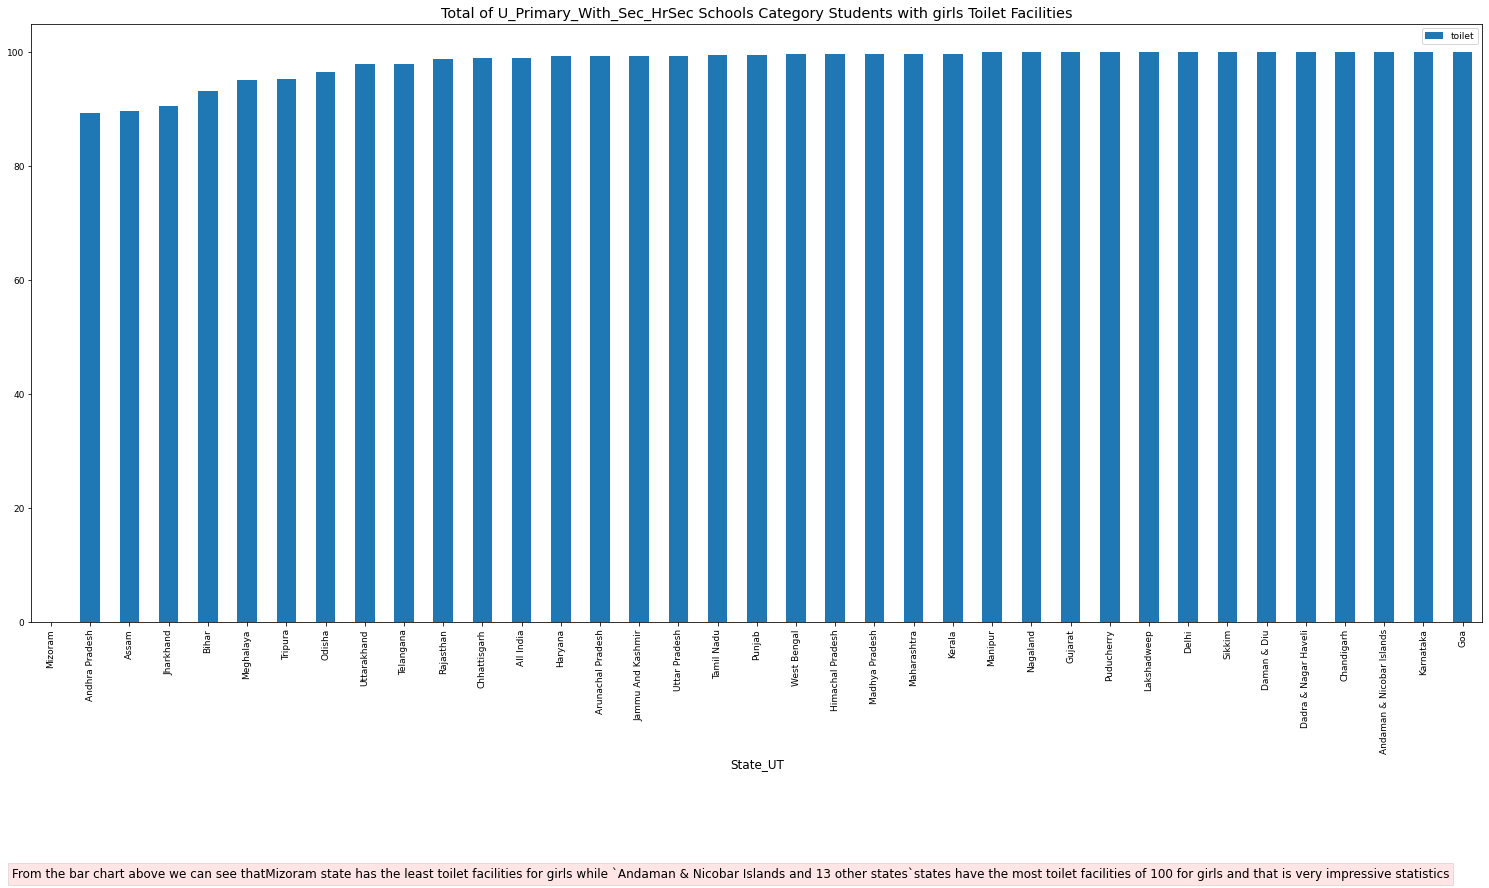

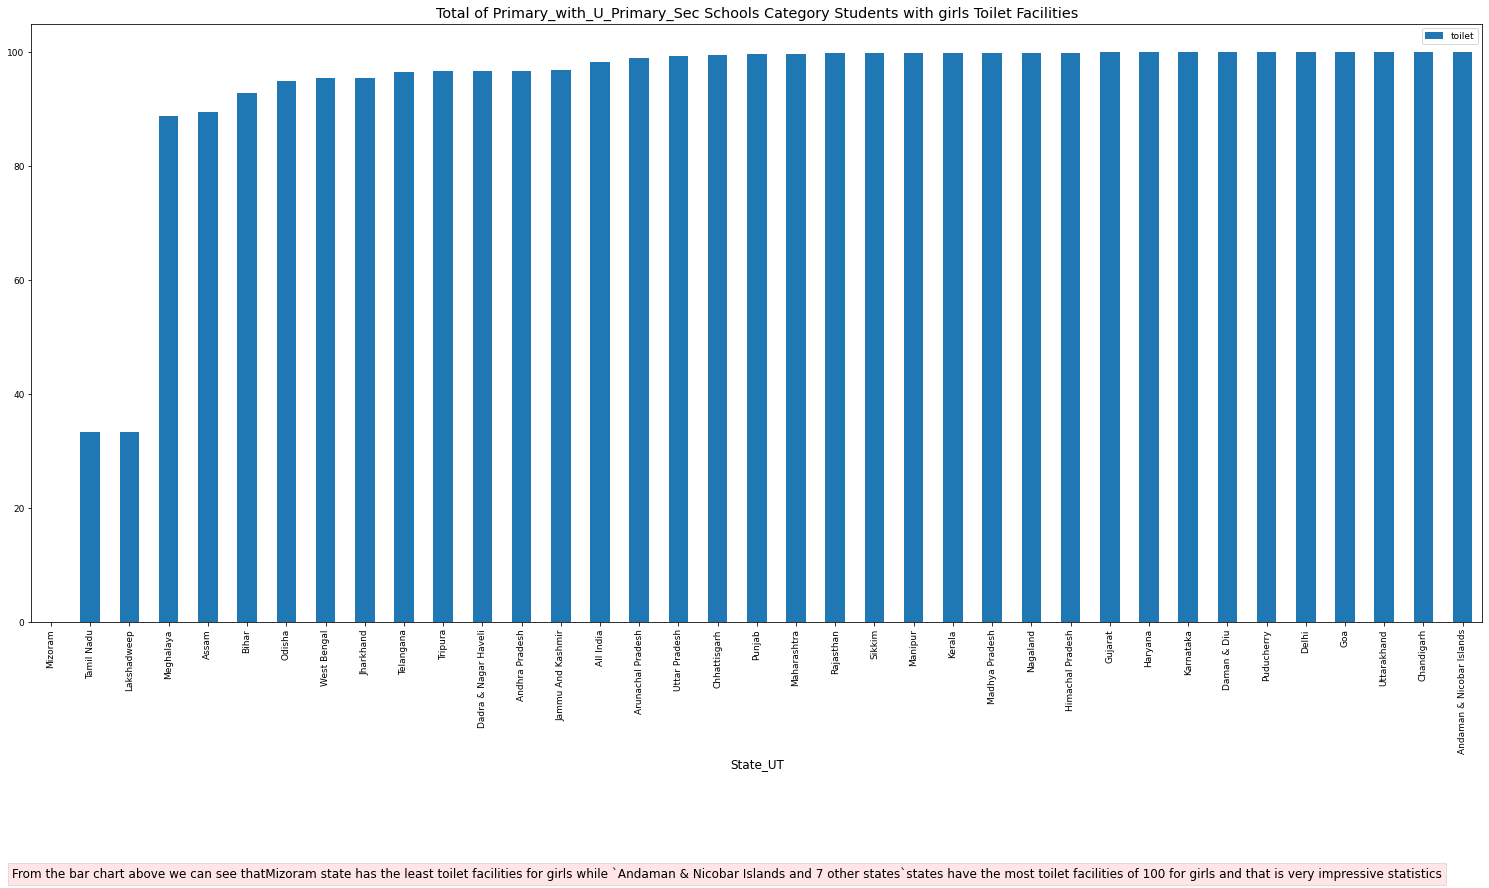

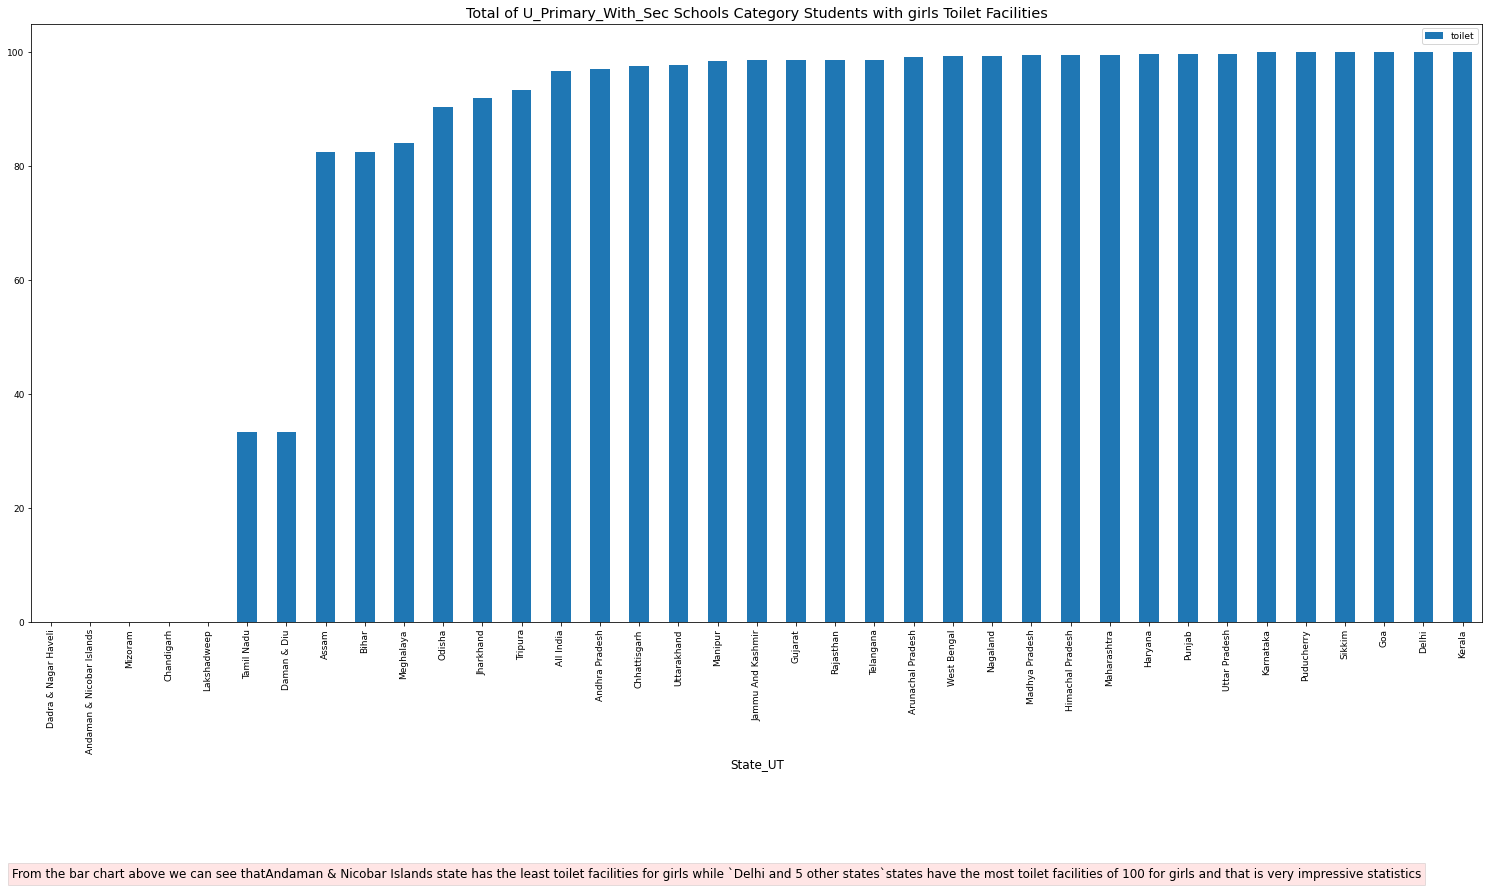

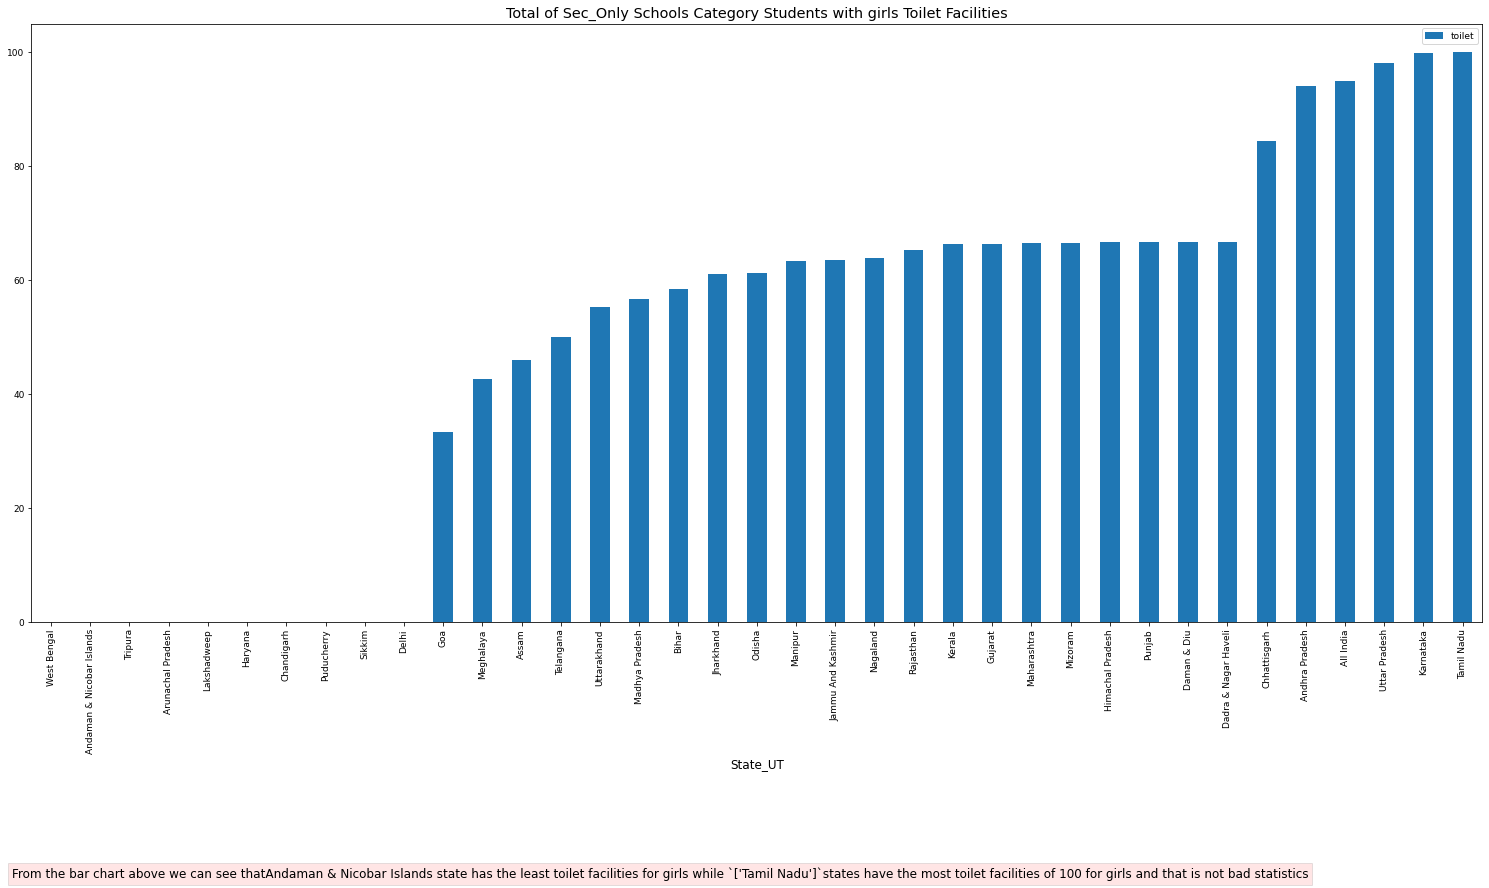

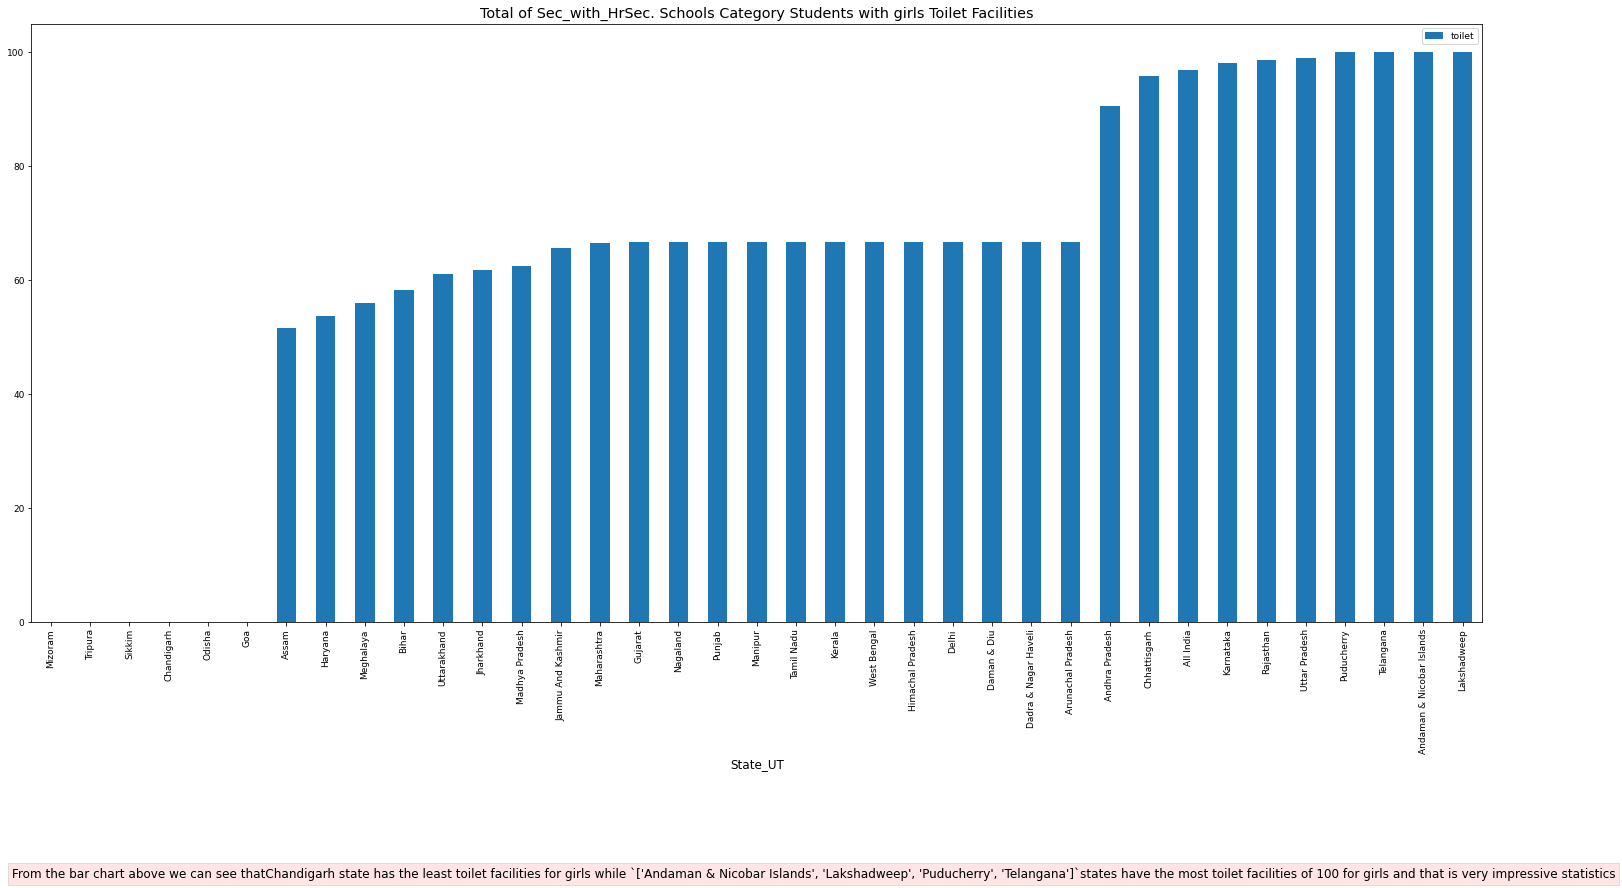

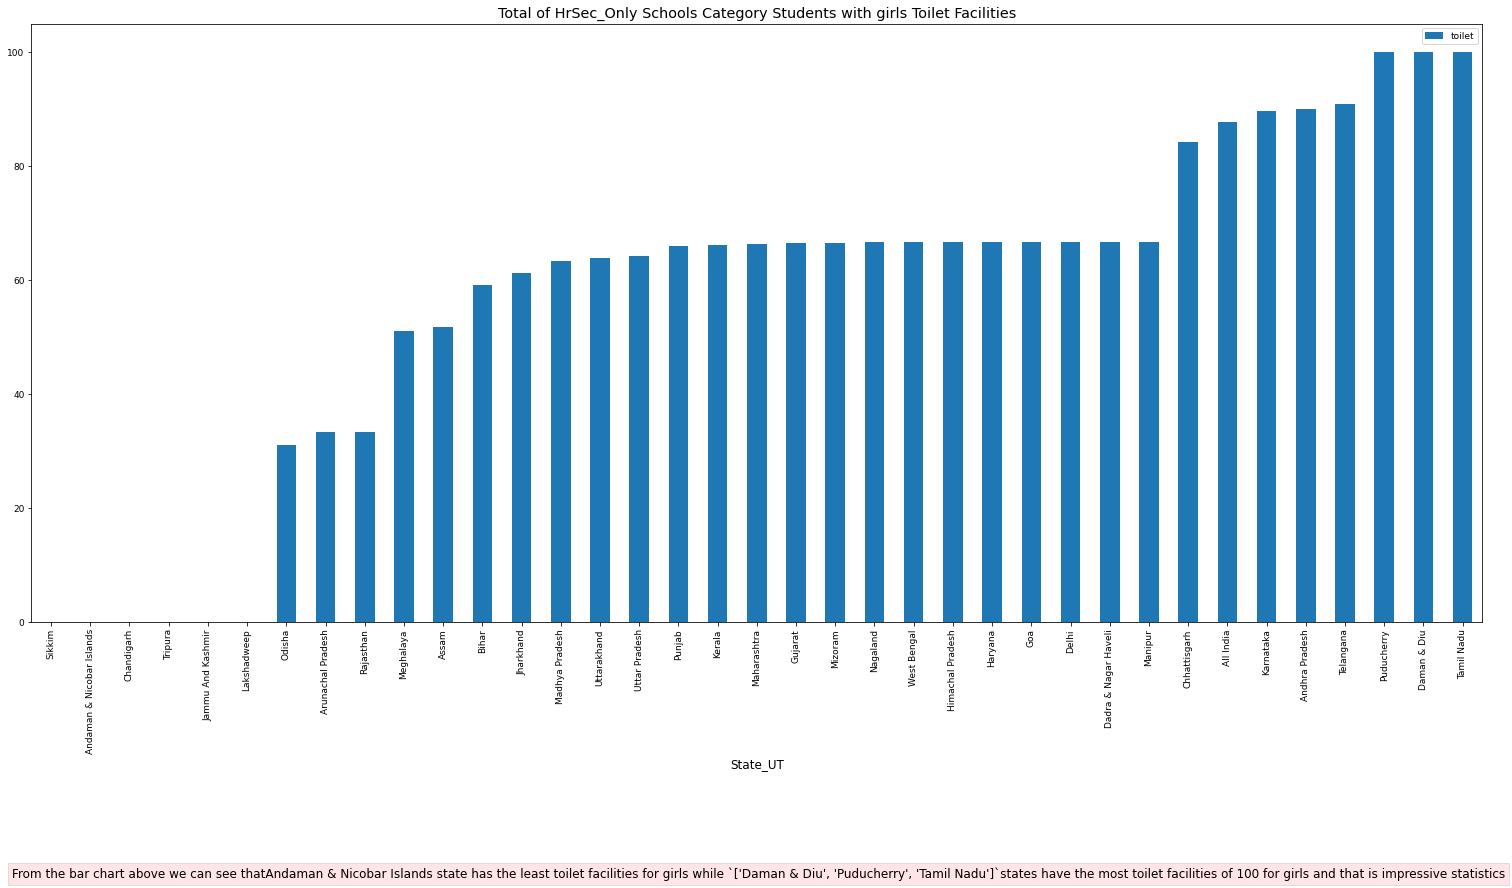

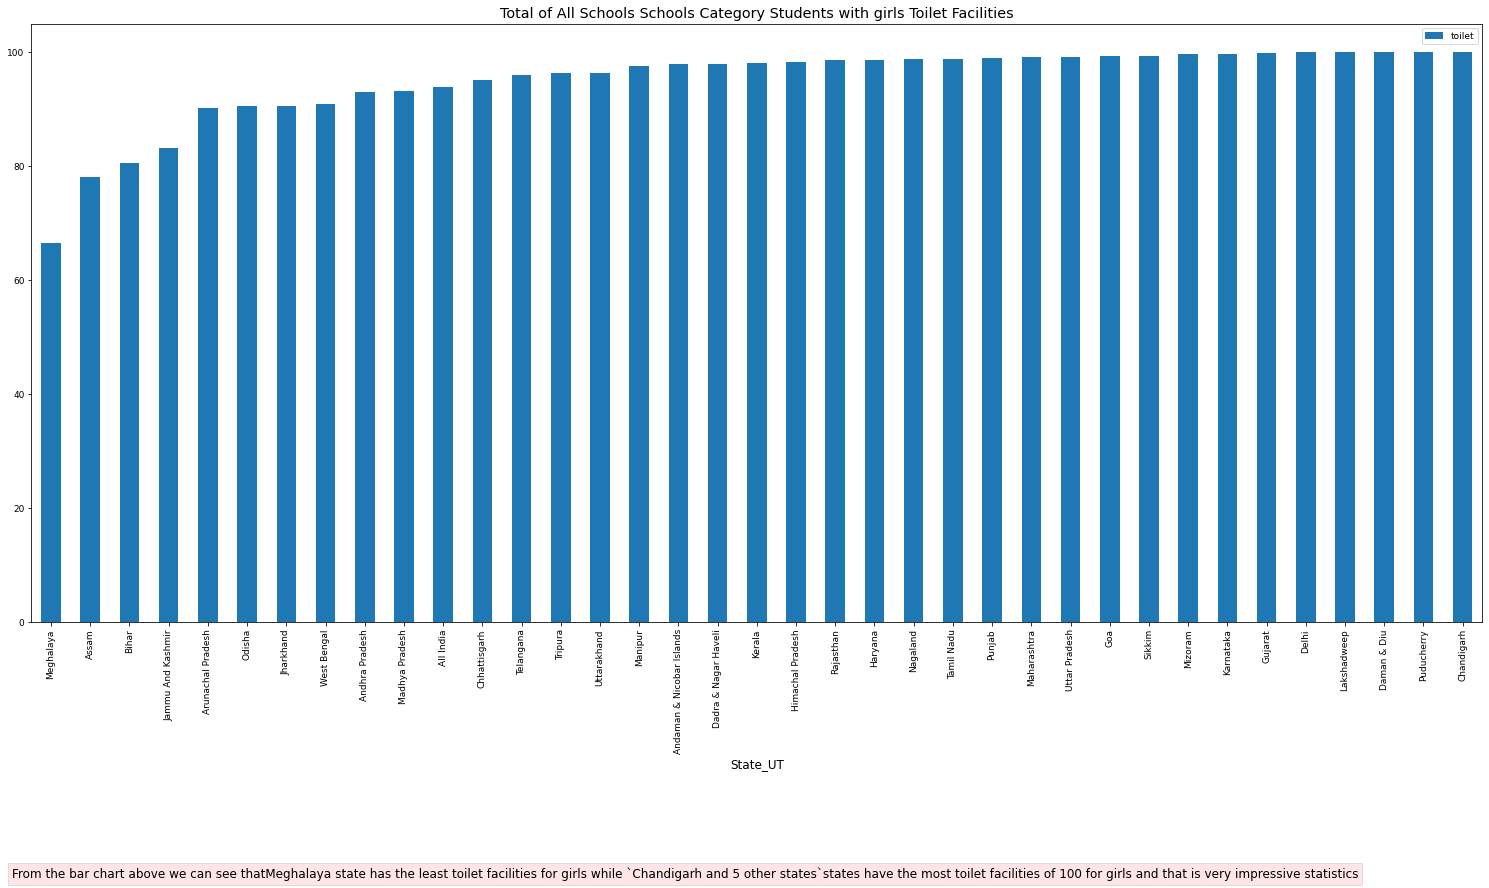

In [11]:
for category in categ:
    tmp_girls = girls_melt[girls_melt['School_Level'] == category]
    mean_tmp_girls = tmp_girls.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_girls.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with girls Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_girls.iloc[np.where(mean_tmp_girls['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_girls.iloc[mean_tmp_girls.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest))
    
    info = 'From the bar chart above we can see that{} state has the least toilet facilities for girls while `{}`states have the most toilet facilities of 100 for girls and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))

In [12]:
boys_2013 = boys_melt.iloc[np.where(boys_melt.year=='2013-14')]

In [13]:
boys_2013.head(2)

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
3,Andhra Pradesh,2013-14,Primary_Only,53.03


In [14]:
boys_2013.shape

(396, 4)

<AxesSubplot:title={'center':'Toilet Failities for boys in all School Categories in 2013-14 session'}, xlabel='School_Level'>

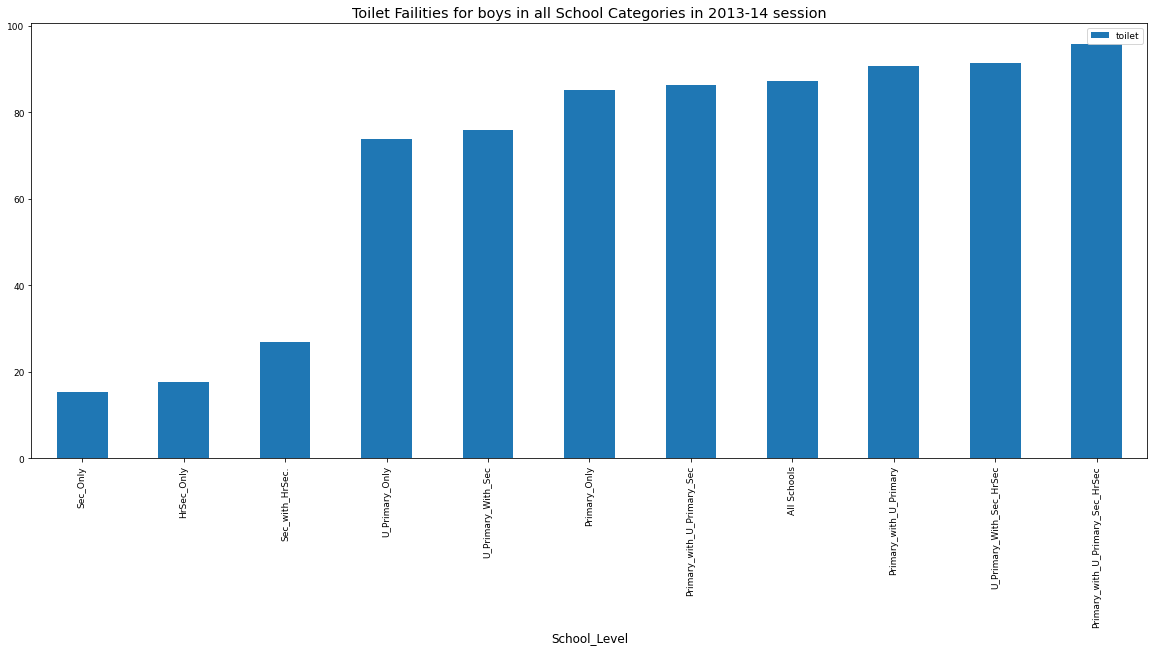

In [15]:
boys_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8),title = 'Toilet Failities for boys in all School Categories in 2013-14 session')

<AxesSubplot:title={'center':'Toilet Failities for boys in all School Categories in 2014-15 session'}, xlabel='School_Level'>

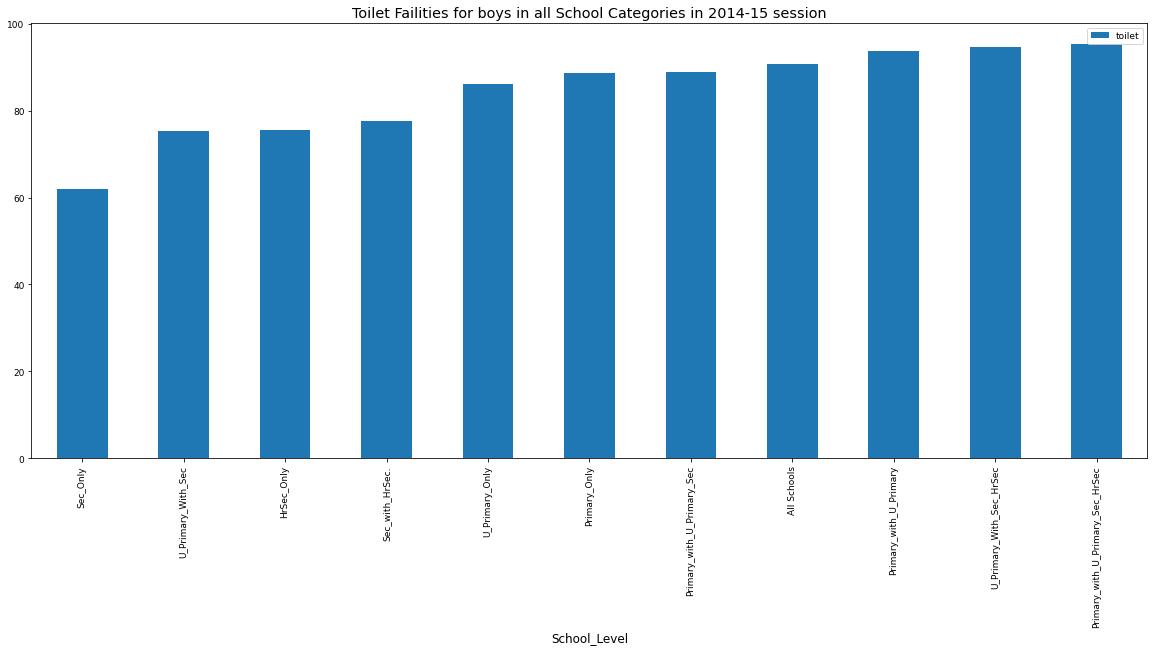

In [16]:
boys_2014 = boys_melt.iloc[np.where(boys_melt.year=='2014-15')]
boys_2014.head(2)
boys_2014.shape


boys_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8),title = 'Toilet Failities for boys in all School Categories in 2014-15 session')

<AxesSubplot:title={'center':' Toilet Failities for boys in all School Categories in 2015-16 session'}, xlabel='School_Level'>

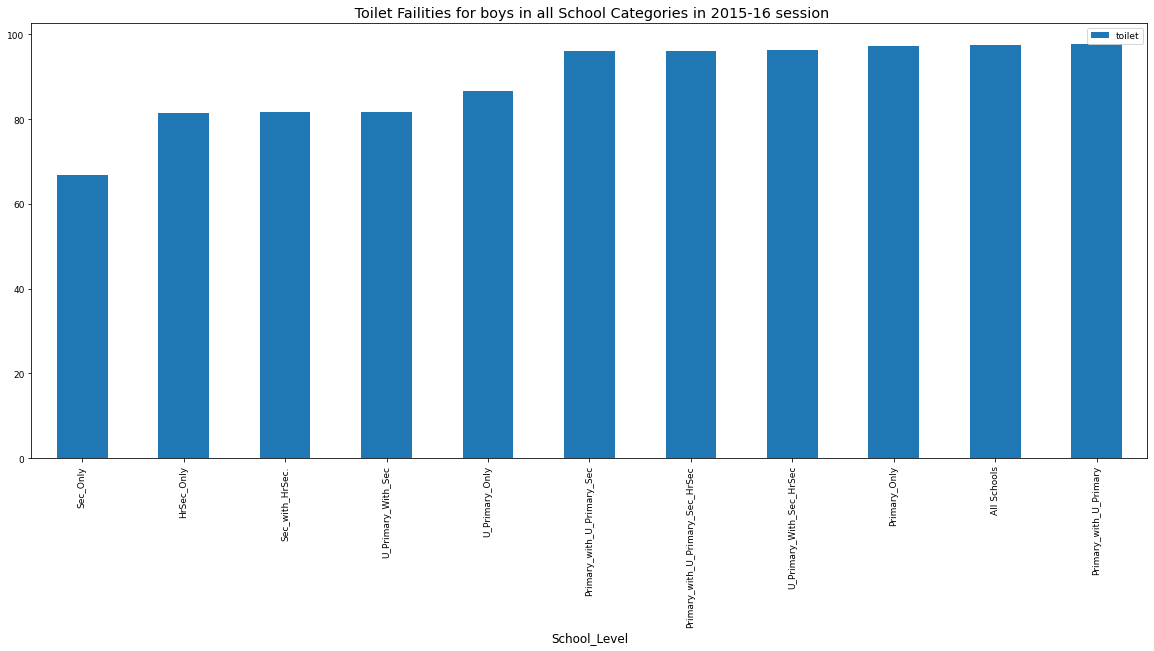

In [17]:
boys_2015 = boys_melt.iloc[np.where(boys_melt.year == '2015-16')]
boys_2015.head(3)
boys_2015.shape

boys_2015.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot( kind = 'bar',
figsize = (20,8), title=' Toilet Failities for boys in all School Categories in 2015-16 session')

<AxesSubplot:title={'center':'Toilet Facilities for girls in all School Categories in 2013-14 session'}, xlabel='School_Level'>

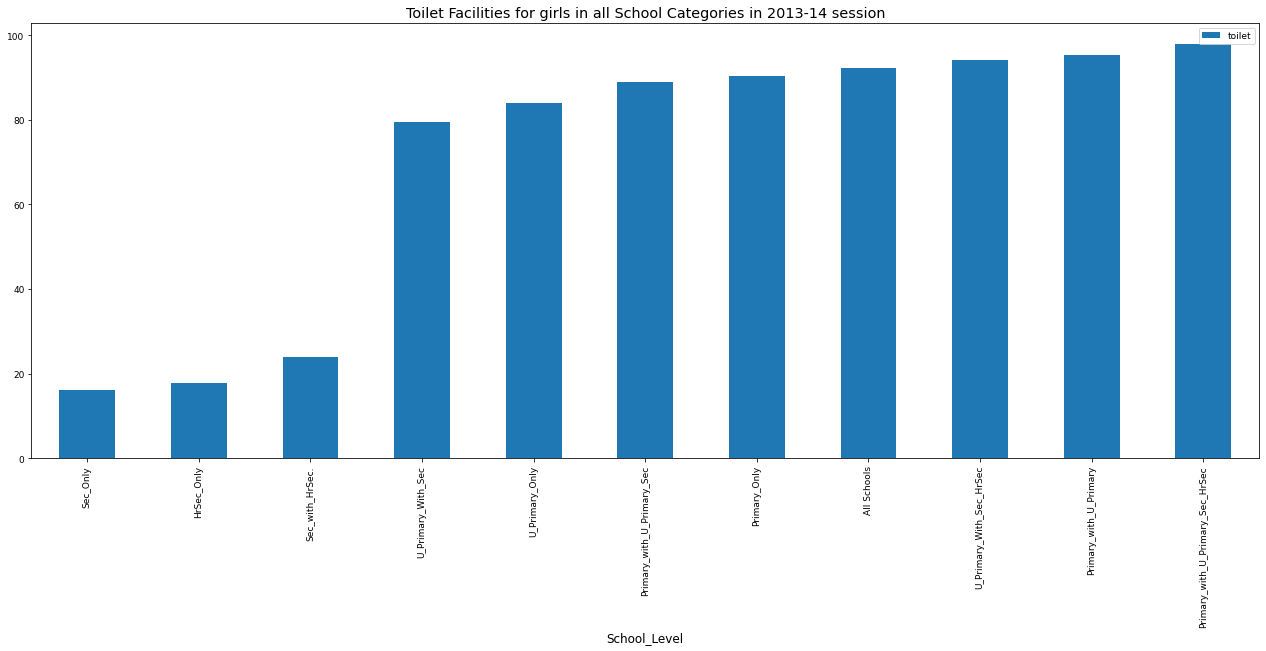

In [18]:
girls_2013 = girls_melt.iloc[np.where(girls_melt.year == '2013-14')]
girls_2013.head(3)
girls_2013.shape

girls_2013.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot(kind = 'bar',
figsize = (22,8),title = 'Toilet Facilities for girls in all School Categories in 2013-14 session')

<AxesSubplot:title={'center':'Toilet Facilities for girls in all School Categories in 2014-15 session'}, xlabel='School_Level'>

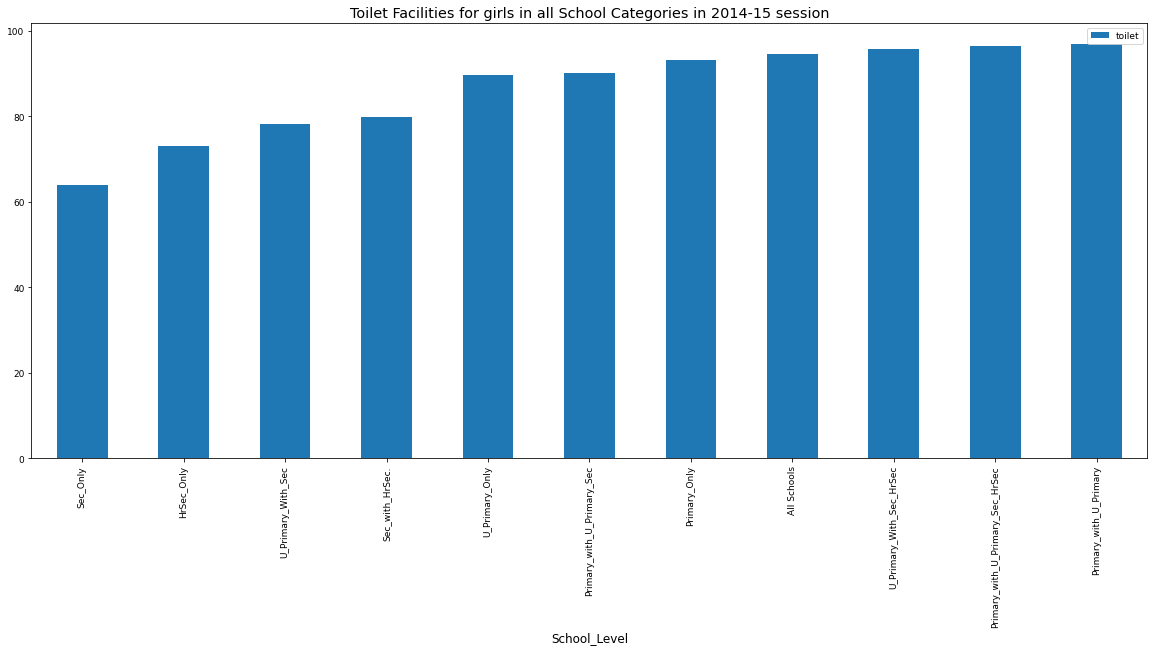

In [19]:
girls_2014 = girls_melt.iloc[np.where(girls_melt.year=='2014-15')]

girls_2014.head(3)
girls_2014.shape

girls_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8), title = 'Toilet Facilities for girls in all School Categories in 2014-15 session')

<AxesSubplot:title={'center':'Toilet Failities for girls in all School Categories in 2015-16 session'}, xlabel='School_Level'>

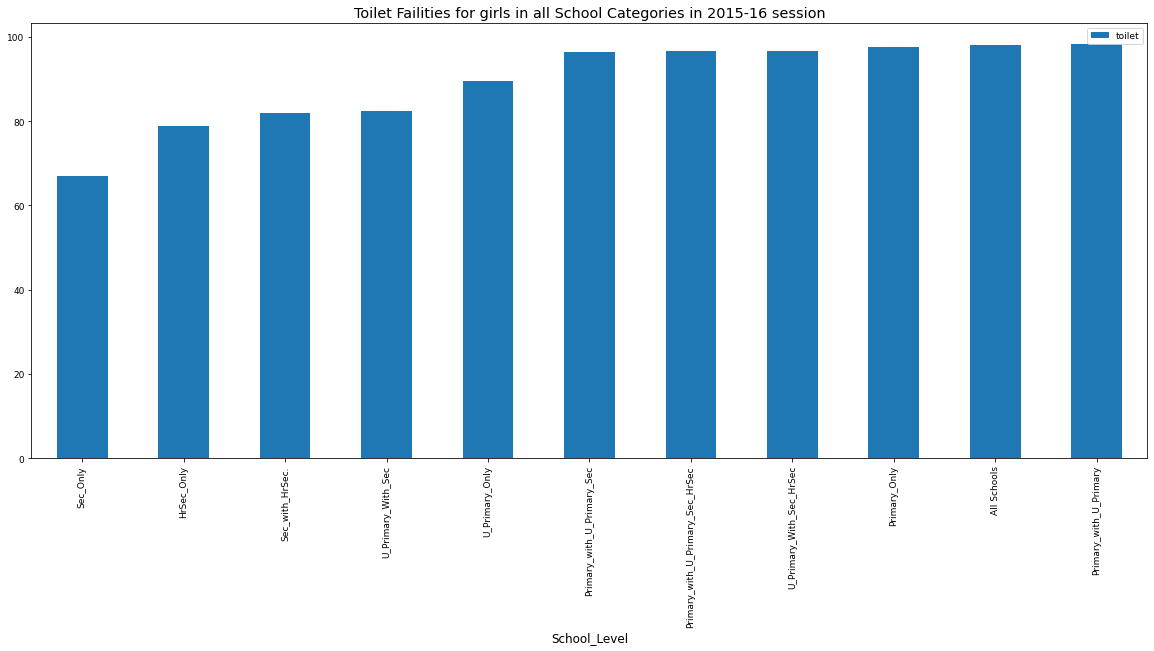

In [20]:
girls_2015 = girls_melt.iloc[np.where(girls_melt.year =='2015-16' )]
girls_2015.head(3)
girls_2015.shape

girls_2015.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot(kind= 'bar',
figsize= (20,8), title = 'Toilet Failities for girls in all School Categories in 2015-16 session')

<AxesSubplot:title={'center':'Toilet Facilities for boys in all States for the 3 sessions'}, xlabel='State_UT'>

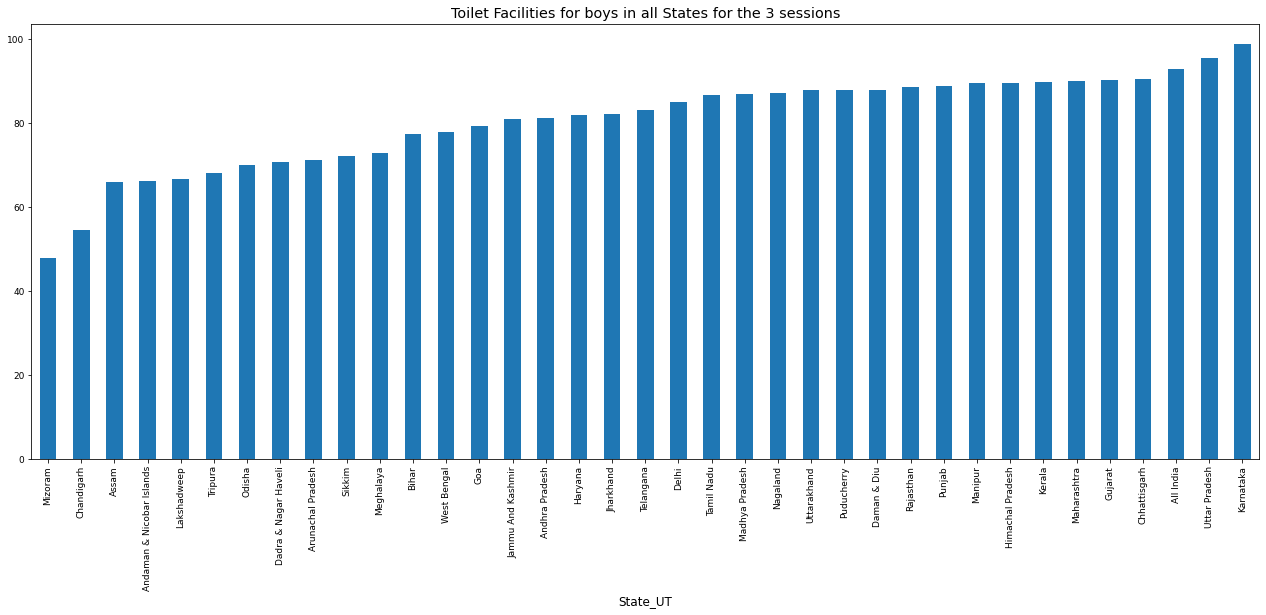

In [21]:
boys_melt.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind = 'bar',
figsize = (22,8)  , title = 'Toilet Facilities for boys in all States for the 3 sessions')

<AxesSubplot:title={'center':'Toilet Failities for girls in all States for the 3 sessions'}, xlabel='State_UT'>

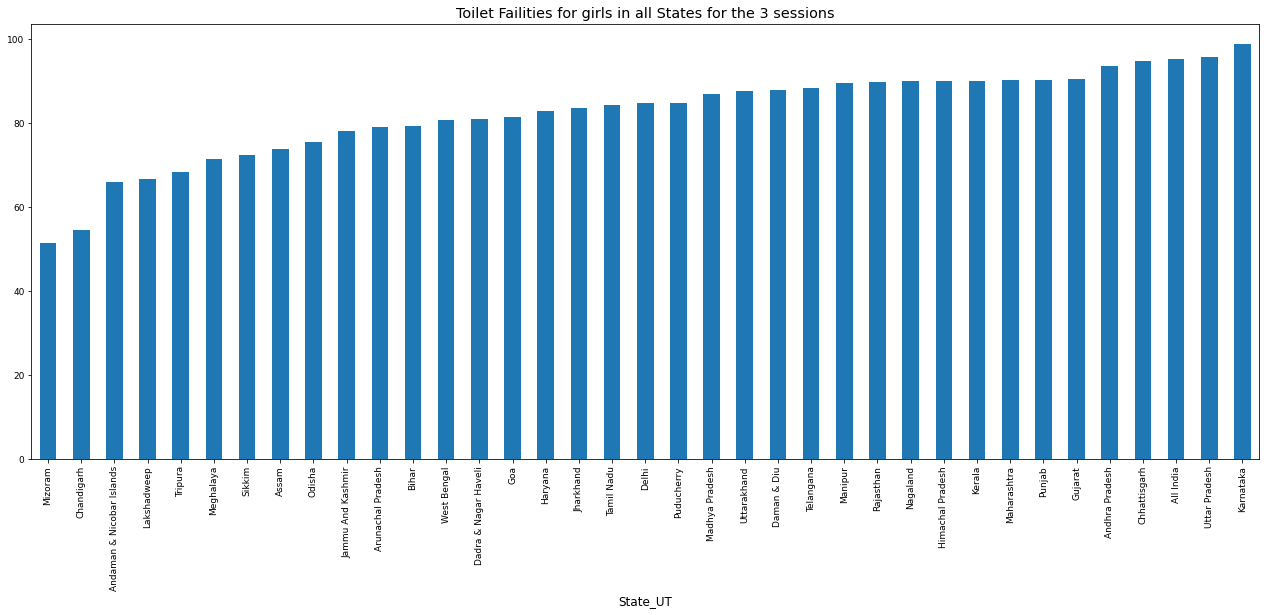

In [22]:
girls_melt.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind = 'bar' ,
 figsize = (22,8), title = 'Toilet Failities for girls in all States for the 3 sessions')